In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
import scipy.stats

In [2]:
df = pd.read_csv("data/main")

## Explanation of Each Predictor
* **battery_power** - Total energy a battery can store in one time measured in mAh
* **blue**          - Whether the phone has bluetooth or not
* **clock_speed**   - Speed at which microprocessor executes instructions
* **dual_sim**      - Has dual sim support or not
* **fc**            - Front camera mega pixels
* **four_g**        - Whether the phone has 4G or not
* **int_memory**    - internal memory in gigabytes
* **m_dep**         - Mobile Depth in cm
* **mobile_wt**     - Weight of mobile phone
* **n_cores**       - Number of cores of a processor
* **pc**            - Primary Camera in mega pixels
* **px_height**     - Pixel Resolution Height
* **px_width**      - Pixel Resoulution Width
* **ram**           - Random Access Memory in Megabytes
* **sc_h**          - Screen Height of mobile in cm
* **sc_w**          - Screen Width of mobile in cm
* **talk_time**     - Longest time that a single battery charge will last when you are talking
* **three_g**       - Whether the phone has 3G or not
* **touch_screen**  - Whether the phone is touch screen or not
* **wifi**          - Whether the phone has wifi or not
* **price_range**   - Response variable; whether the phone is expensive or not

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range,Data
0,842,No,2.2,No,1,7,0.6,188,2,2,20,756,2549,9,7,19,No,Yes,Below Average,Regular
1,1021,Yes,0.5,Yes,0,53,0.7,136,3,6,905,1988,2631,17,3,7,Yes,No,Above Average,4G
2,563,Yes,0.5,Yes,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,Yes,No,Above Average,4G
3,615,Yes,2.5,No,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,No,No,Above Average,3G
4,1821,Yes,1.2,No,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,Yes,No,Below Average,4G


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   int_memory     2000 non-null   int64  
 6   m_dep          2000 non-null   float64
 7   mobile_wt      2000 non-null   int64  
 8   n_cores        2000 non-null   int64  
 9   pc             2000 non-null   int64  
 10  px_height      2000 non-null   int64  
 11  px_width       2000 non-null   int64  
 12  ram            2000 non-null   int64  
 13  sc_h           2000 non-null   int64  
 14  sc_w           2000 non-null   int64  
 15  talk_time      2000 non-null   int64  
 16  touch_screen   2000 non-null   object 
 17  wifi           2000 non-null   object 
 18  price_ra

As we can see, there are no null values in the dataset

In [5]:
df.describe(include="all")

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range,Data
count,2000.000000,2000,2000.000000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000,2000,2000
unique,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,4,3
top,NaN,No,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Below Average,4G
freq,NaN,1010,NaN,1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1006,1014,500,1043
mean,1238.518500,NaN,1.522250,NaN,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,NaN,NaN,NaN,NaN
std,439.418206,NaN,0.816004,NaN,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,NaN,NaN,NaN,NaN
min,501.000000,NaN,0.500000,NaN,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,NaN,NaN,NaN,NaN
25%,851.750000,NaN,0.700000,NaN,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,NaN,NaN,NaN,NaN
50%,1226.000000,NaN,1.500000,NaN,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,NaN,NaN,NaN,NaN
75%,1615.250000,NaN,2.200000,NaN,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,NaN,NaN,NaN,NaN


## Distribution of the Data (Univariate)

### First look at the distribution of categorical data.
- All categorical variables are evenly distributed except for 3G
- It seems the phones that allow 4G are included in the 3G predictor. May cause some dependency issues
- Our response variable is evenly distributed among all four categories
 - look at clock speed and cores
 - sual sim and clock speed
 - ram and clock speed

In [6]:
cont = ['battery_power', "clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", 
              "px_height", "px_width", "ram", "sc_h", "sc_w", "talk_time"]
df_cont = df[cont]
df_cat = df.drop(cont, axis=1)

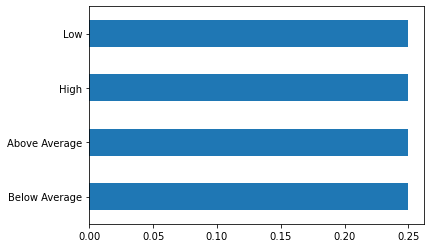

In [7]:
df.price_range.value_counts(normalize=True)
df.price_range.value_counts(normalize=True).plot.barh()
plt.show()

In [8]:
df_cat.head()

,blue,dual_sim,touch_screen,wifi,price_range,Data
0,No,No,No,Yes,Below Average,Regular
1,Yes,Yes,Yes,No,Above Average,4G
2,Yes,Yes,Yes,No,Above Average,4G
3,Yes,No,No,No,Above Average,3G
4,Yes,No,Yes,No,Below Average,4G


Text(0.5, 1.0, '% of Phones Data Speed Capacity')

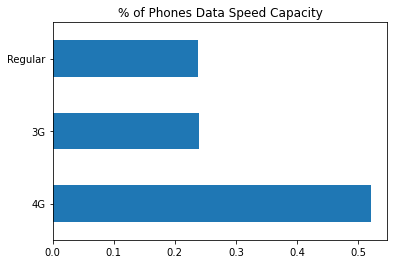

In [36]:
ax = df.Data.value_counts(normalize=True).plot.barh()
ax.set_title("% of Phones Data Speed Capacity")

We can see about half of our data consists of phones with 4G capability. The rest are evenly split between regular and 3G. Also, our price range phones are evenly split among classes. Other than the data columns, the rest of the categorical variables are evenly split. 

We can see by the histograms below, that are data doesn't follow a normal distribution. Therefore, we may need to normalize them before building our model.

array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'clock_speed'}>,
        <AxesSubplot:title={'center':'fc'}>,
        <AxesSubplot:title={'center':'int_memory'}>],
       [<AxesSubplot:title={'center':'m_dep'}>,
        <AxesSubplot:title={'center':'mobile_wt'}>,
        <AxesSubplot:title={'center':'n_cores'}>,
        <AxesSubplot:title={'center':'pc'}>],
       [<AxesSubplot:title={'center':'px_height'}>,
        <AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>],
       [<AxesSubplot:title={'center':'sc_w'}>,
        <AxesSubplot:title={'center':'talk_time'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

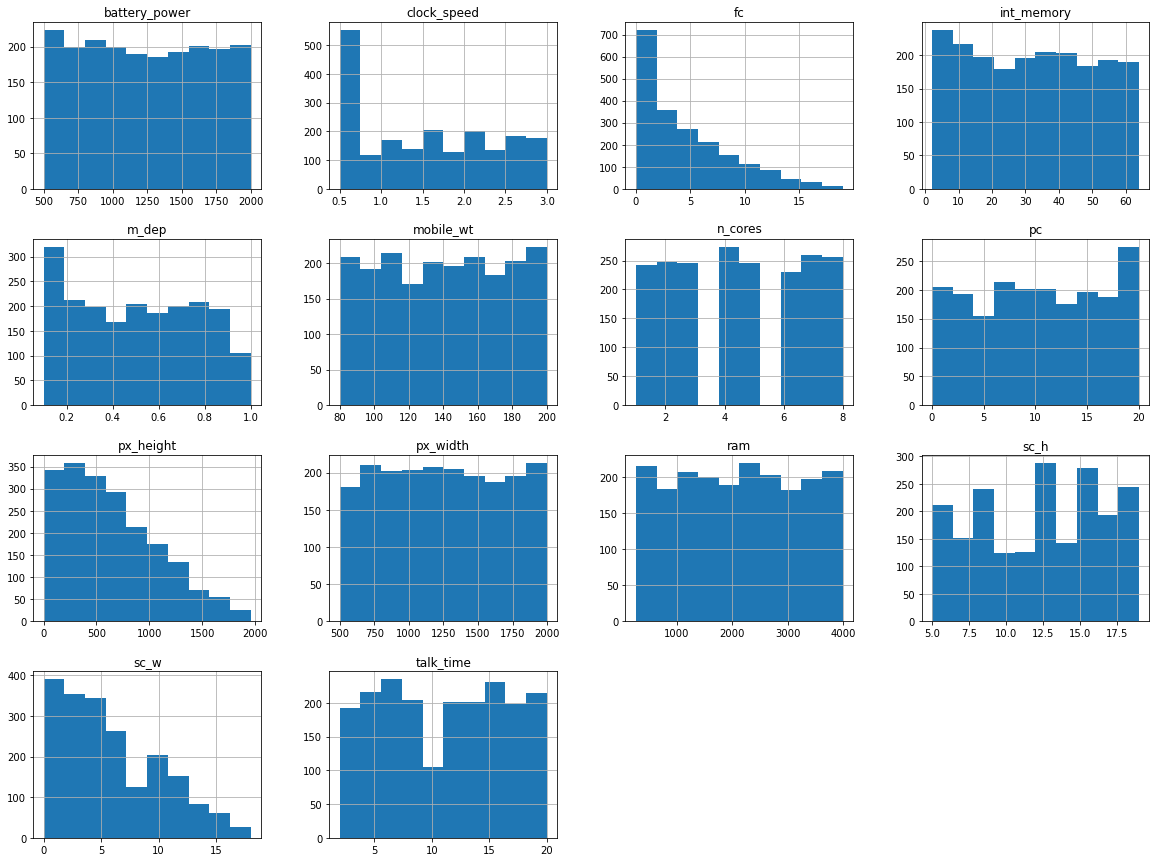

In [10]:
df_cont.hist(figsize=(20,15))

Next, we can see that Pc and fc are highly correlated. This makes sense as the primary camera is often the front camera. **May want to drop the front camera and focus on using the primary camera.** Also, pixel width/height are correlated along with screen height and screen widt. Again, this makes perfect sense. 

<AxesSubplot:>

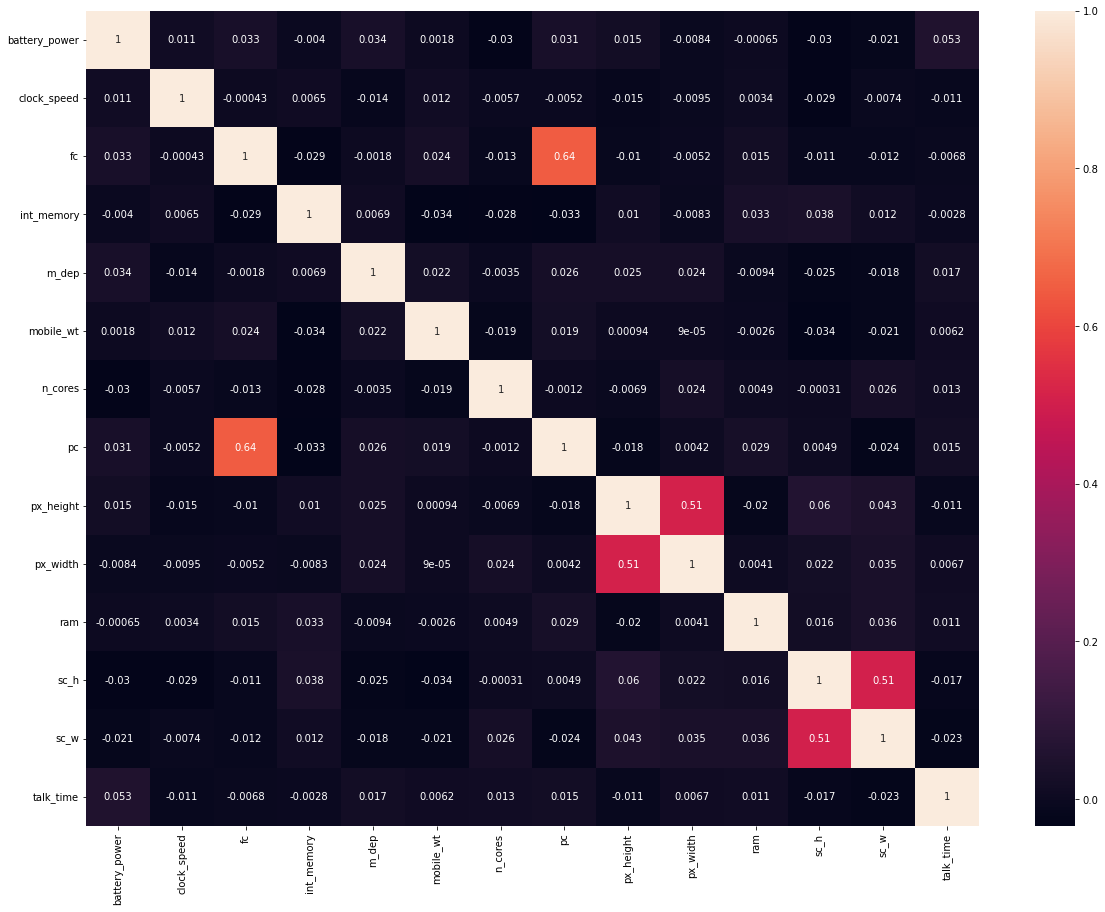

In [11]:
plt.subplots(figsize=(20,15))
sns.heatmap(df[cont].corr(), annot=True)

In [12]:
pd.pivot_table(df, index="price_range", values=cont)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
price_range,,,,,,,,,,,,,,
Above Average,1228.320,1.5298,4.498,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972
Below Average,1228.868,1.4886,4.340,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362
High,1379.984,1.5204,4.316,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098
Low,1116.902,1.5502,4.084,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612


### Look at the distribution of continuous data

- px_height has an outlier
    - It is 1960, again this may not be an error as many expensive phones have this resolution.
- fc has multiple outliers
    - not an error due to phones having mega pixels over 20
- rest of data follows fairly normal distribution. 

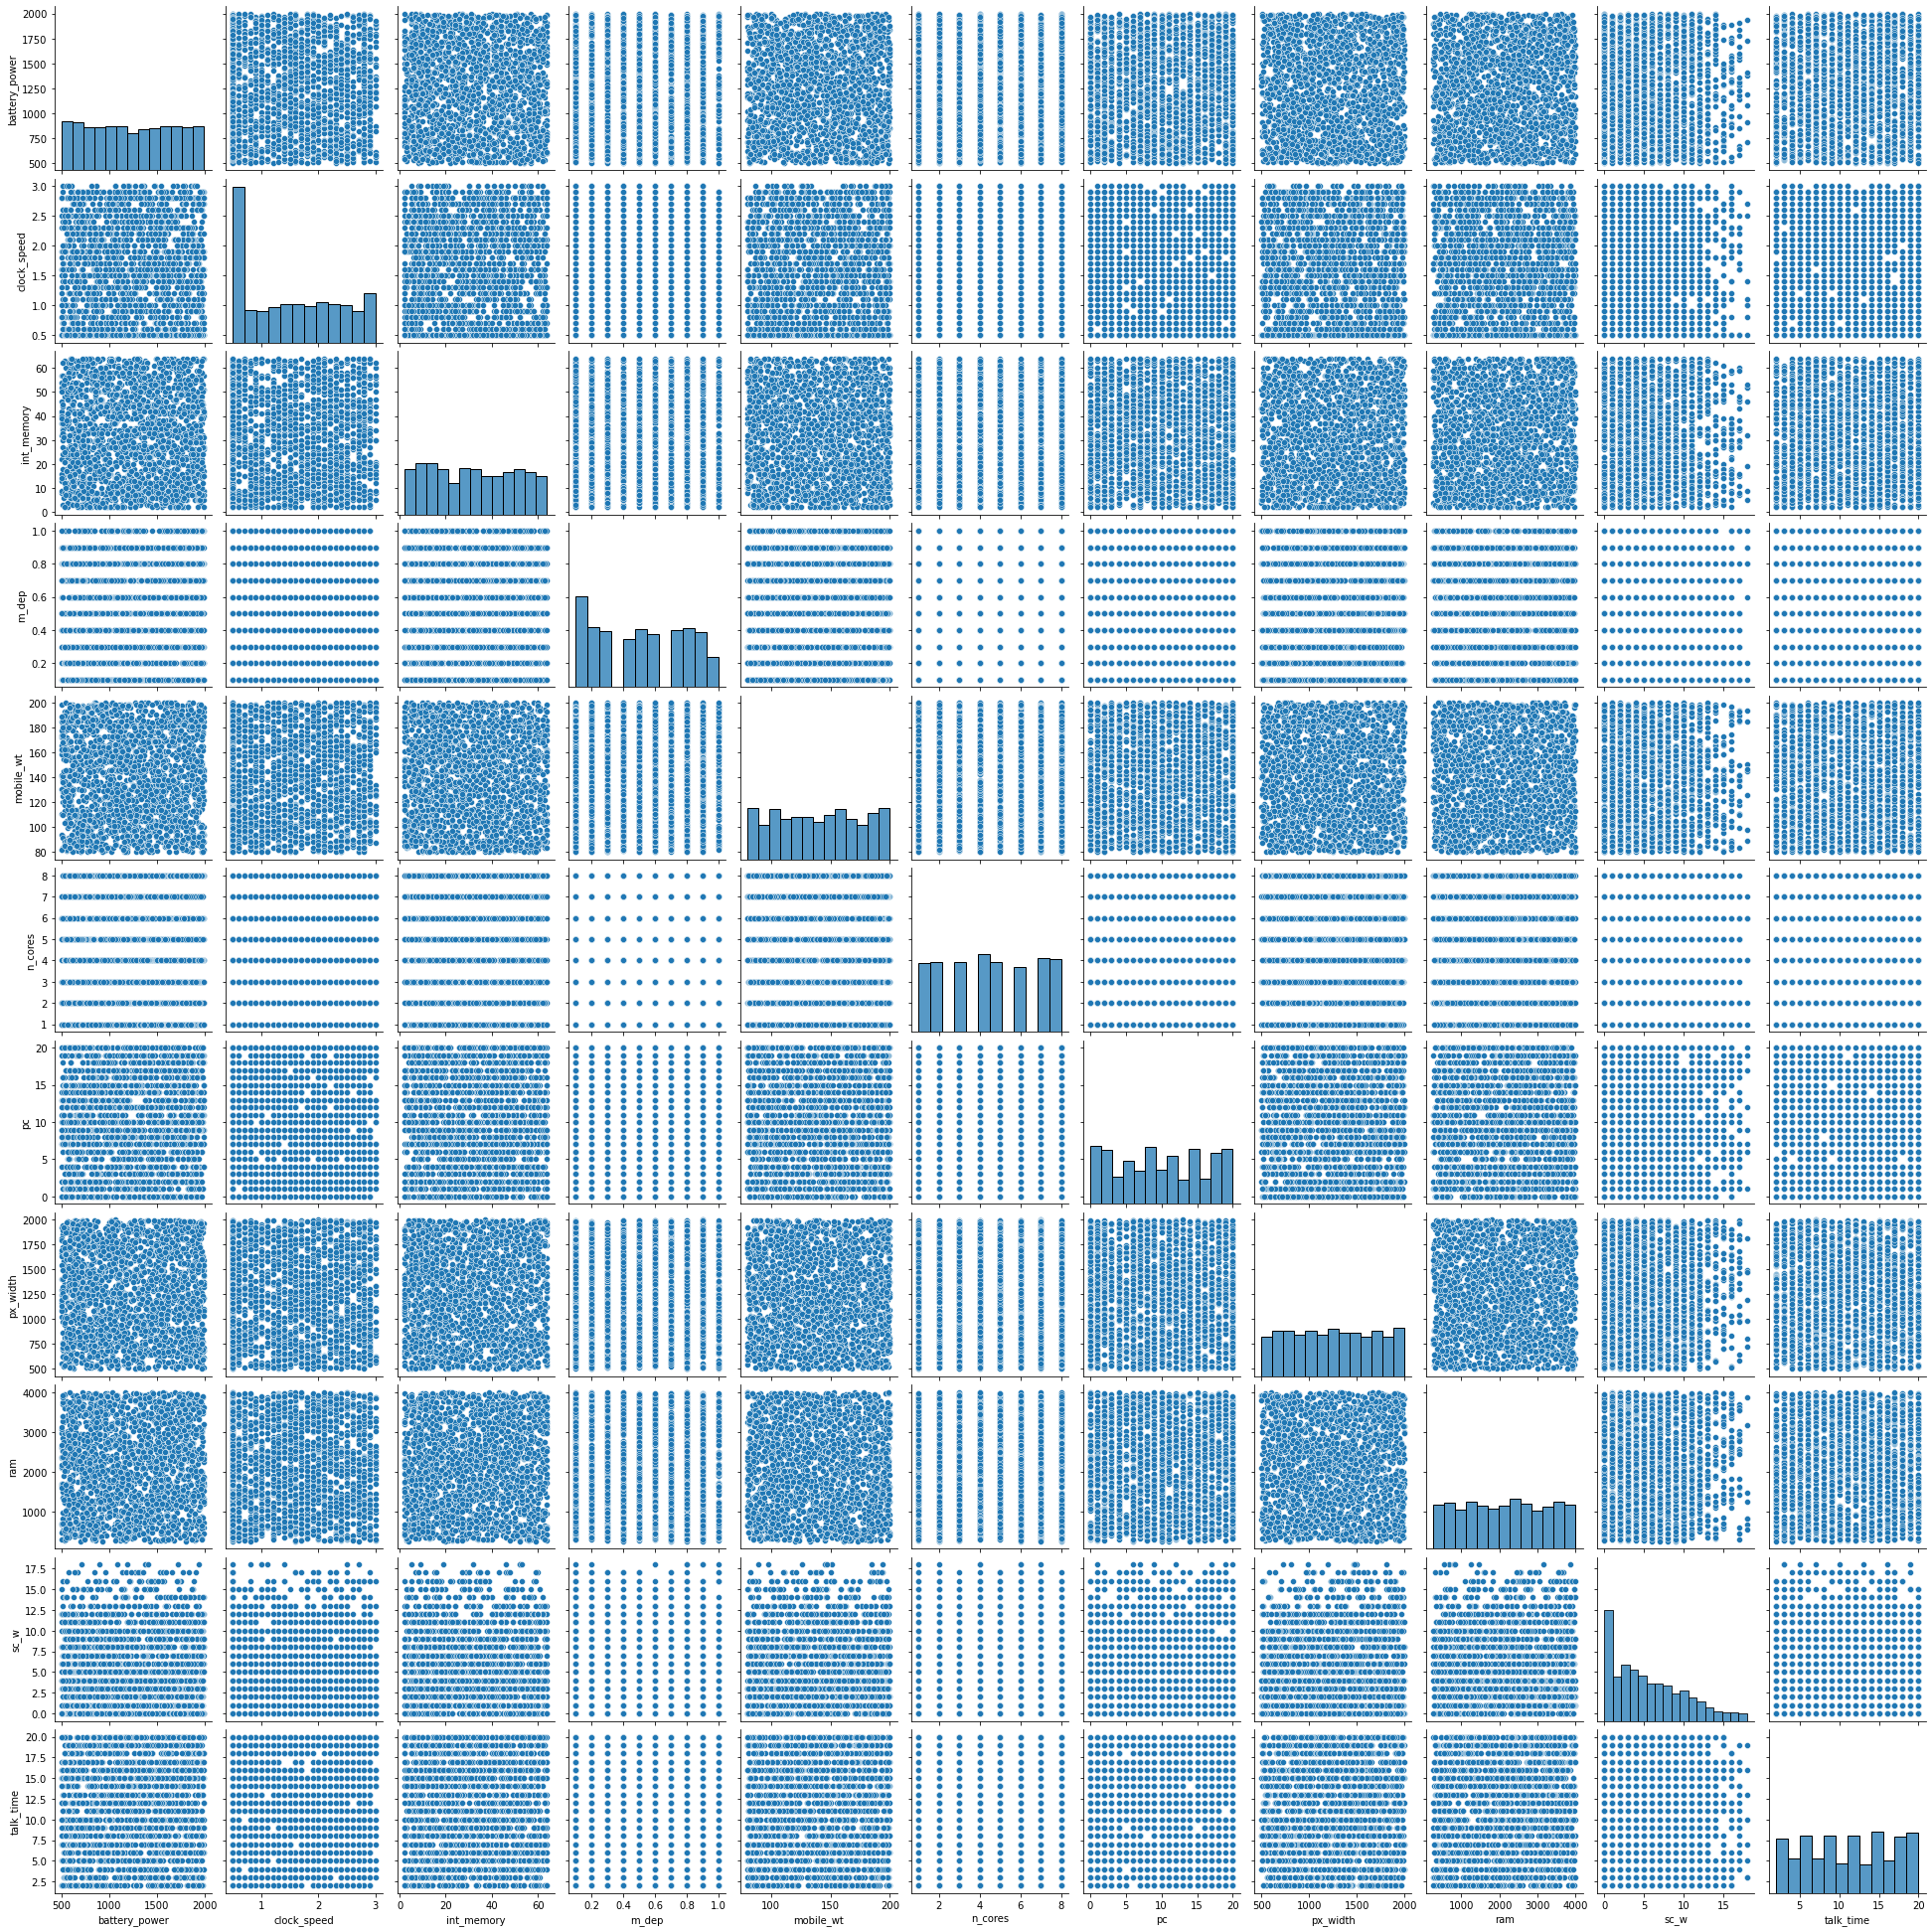

In [37]:
sns.pairplot(df)

In [13]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


Pixel height is set at 0 for a couple of the data points. This is impossible as you need a pixel height for a phone. Can we compute a quick regression model to impute the missing values?. We'll need to look at a scatter plot to see if there us a relationship.

In [14]:
df[(df['px_height'] < 10) | (df['px_width'] == 0)]

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range,Data
73,1038,No,1.2,No,3,43,0.7,141,1,5,4,638,3709,11,0,12,Yes,Yes,High,3G
468,765,No,2.9,No,0,18,0.1,153,7,0,6,793,1066,11,1,16,Yes,No,Low,4G
786,774,Yes,2.8,No,7,55,0.9,124,3,18,8,896,3916,8,1,12,Yes,No,High,4G
801,1422,No,1.0,No,15,3,0.1,112,1,17,1,926,509,19,1,3,Yes,Yes,Low,3G
946,1625,Yes,0.5,Yes,2,50,0.1,107,8,17,8,1219,670,16,3,8,No,No,Low,4G
1305,1023,Yes,2.3,Yes,5,30,0.2,80,8,7,5,1744,2086,10,0,19,Yes,Yes,Below Average,4G
1314,1901,Yes,0.5,No,5,41,0.6,131,2,17,3,1662,368,5,1,12,No,No,Low,4G
1481,1834,No,2.1,No,7,40,0.1,99,4,11,0,1987,3692,13,0,16,Yes,No,High,4G
1536,1412,No,0.6,No,9,57,0.2,86,3,10,2,660,1853,15,10,18,No,Yes,Below Average,Regular
1596,832,Yes,0.5,Yes,1,5,0.1,165,5,2,9,1944,3946,12,5,14,Yes,Yes,High,4G


It is possible for phones to have smaller pixel heights. The phones of the 1990s and Early 2000s had very small screen heights but large widths. However, many of the values have a  value less than 10; this is less than 0.1 inches of scree height. Also, the hight is highlt correlated with the screen width. Therefore, we will drop the variable. Also, due to a similar issue, we will drop screen height as well. Lastly, we will drop the 'front camera' variable due to it's high correlation with 'primary camera'. More times than not, the primary camera is the front camera. 

<AxesSubplot:xlabel='px_width', ylabel='px_height'>

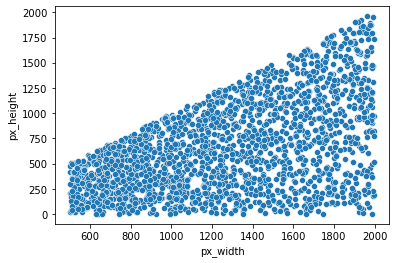

In [15]:
sns.scatterplot(data=df, x="px_width", y="px_height")

In [16]:
df.drop(['px_height', 'sc_h', 'fc'], axis=1, inplace=True)

<AxesSubplot:>

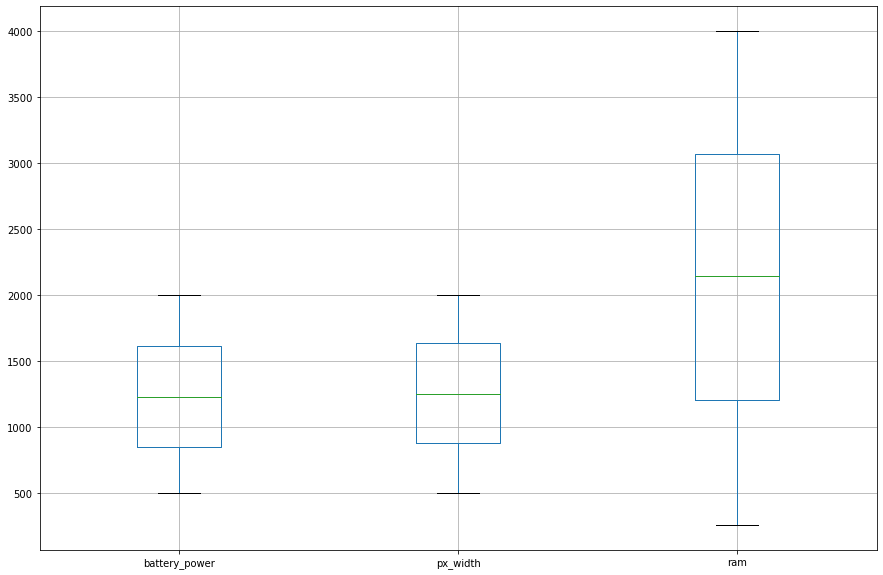

In [17]:
df[['battery_power', 'px_width', 'ram']].boxplot(figsize=(15,10))

<AxesSubplot:>

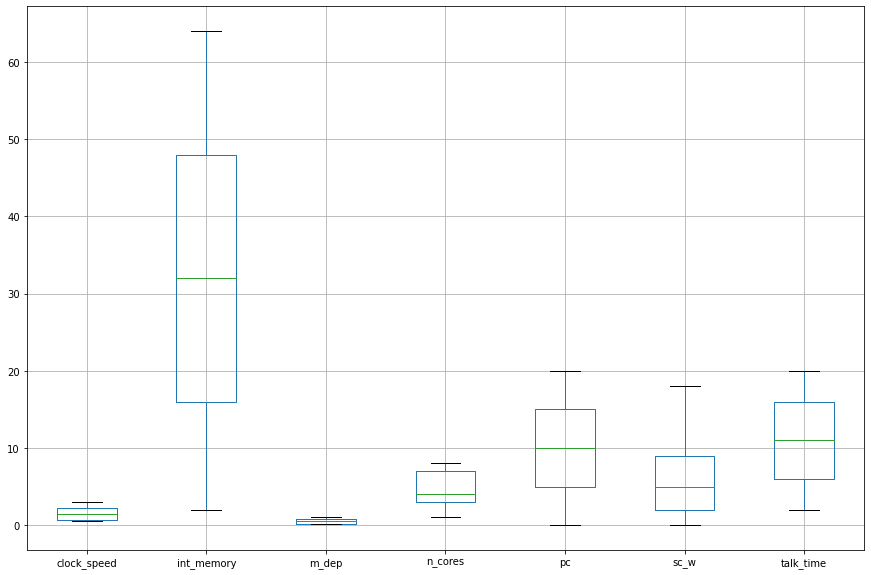

In [18]:
df.drop(['battery_power', 'px_width', 'ram', 'mobile_wt'], axis=1).boxplot(figsize=(15,10))

<AxesSubplot:>

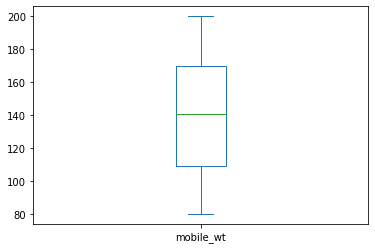

In [19]:
df['mobile_wt'].plot.box()

## Variables Compared with Price Range

## Explanation of Each Predictor
* **Data**          - Whether the phone has 4G or not
* **int_memory**    - internal memory in gigabytes
* **price_range**   - Response variable; whether the phone is expensive or not

Text(0.5, 1.0, 'Price Range vs Battery Power')

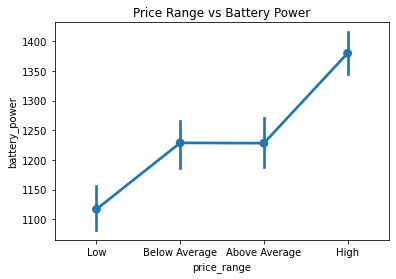

In [20]:
orderx = ['Low', 'Below Average', "Above Average", "High"]
sns.pointplot(x="price_range", y="battery_power", order=orderx, data=df)
plt.title("Price Range vs Battery Power")

Text(0.5, 1.0, 'Price Range vs Battery Power')

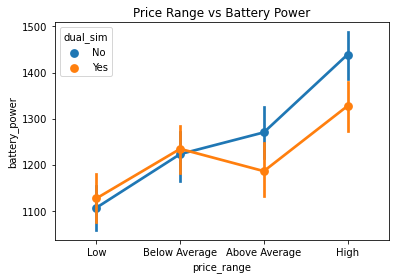

In [21]:
# Battery Power, Dual Sim and  Price Range
sns.pointplot(x="price_range", y="battery_power", hue = "dual_sim", order=orderx, data=df)
plt.title("Price Range vs Battery Power")

As we can see, the higher priced phones tend to have a larger battery power while lower priced cell phones tend to have lower battery power. Surprisingly, there seems to be almost No difference between below average and above average pricing. However, Lower and below average priced phones tend to have similar battery power whether they had dual sim or not. However, for higher prices phones, the batter power seemed to be higher for phones that didn't have it. 

Text(0.5, 1.0, 'Percentage of Phones With Bluetooth by Price Range')

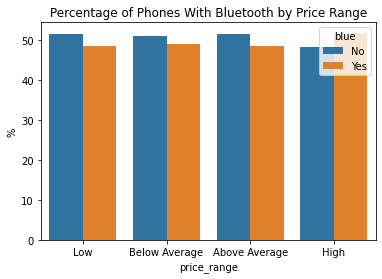

In [22]:
#Bluetooth vs Price Range
df_blue_count = df.groupby('price_range')['blue'].value_counts(normalize=True).rename('%').mul(100).reset_index()
sns.barplot(x="price_range", y="%", hue='blue', order=orderx, data=df_blue_count)
plt.title('Percentage of Phones With Bluetooth by Price Range')

We can also see for all but the 'High' price range, the majority of the phones were not bluetooth. This could mean that bluetooth is only prevelant on higher prices phones.

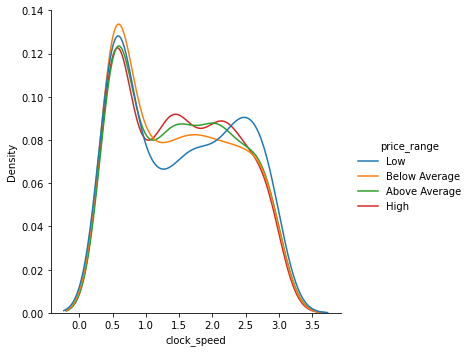

In [23]:
#Clock Speed vs Price_Range
sns.displot(x="clock_speed", hue="price_range", data=df, kind="kde", hue_order= orderx)

As we can tell, it seems that below_average phones may have slightly below average phones are more likely to have 
slighlty lower clock speeds than their counterparts. However, as expected, low priced phones tend to have slower clock speeds.

In [24]:
#Touch Screen vs Price Range
contingency = pd.crosstab(df['price_range'], df['touch_screen'])
c, p, dof, expected = scipy.stats.chi2_contingency(contingency)
p

0.27470114180281896

We fail to reject the null hypothesis.

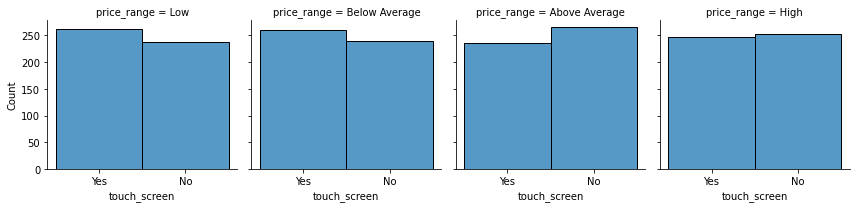

In [25]:
touch_plot = sns.FacetGrid(df, col="price_range", col_order=orderx)
touch_plot.map(sns.histplot, "touch_screen")

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

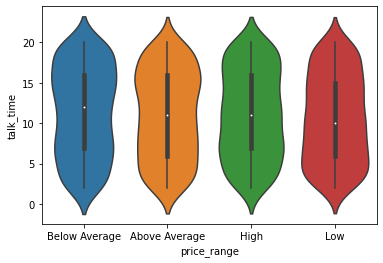

In [26]:
sns.violinplot(data=df, x="price_range", y="talk_time", hue_order= orderx)

Text(0.5, 0, 'Price Range')

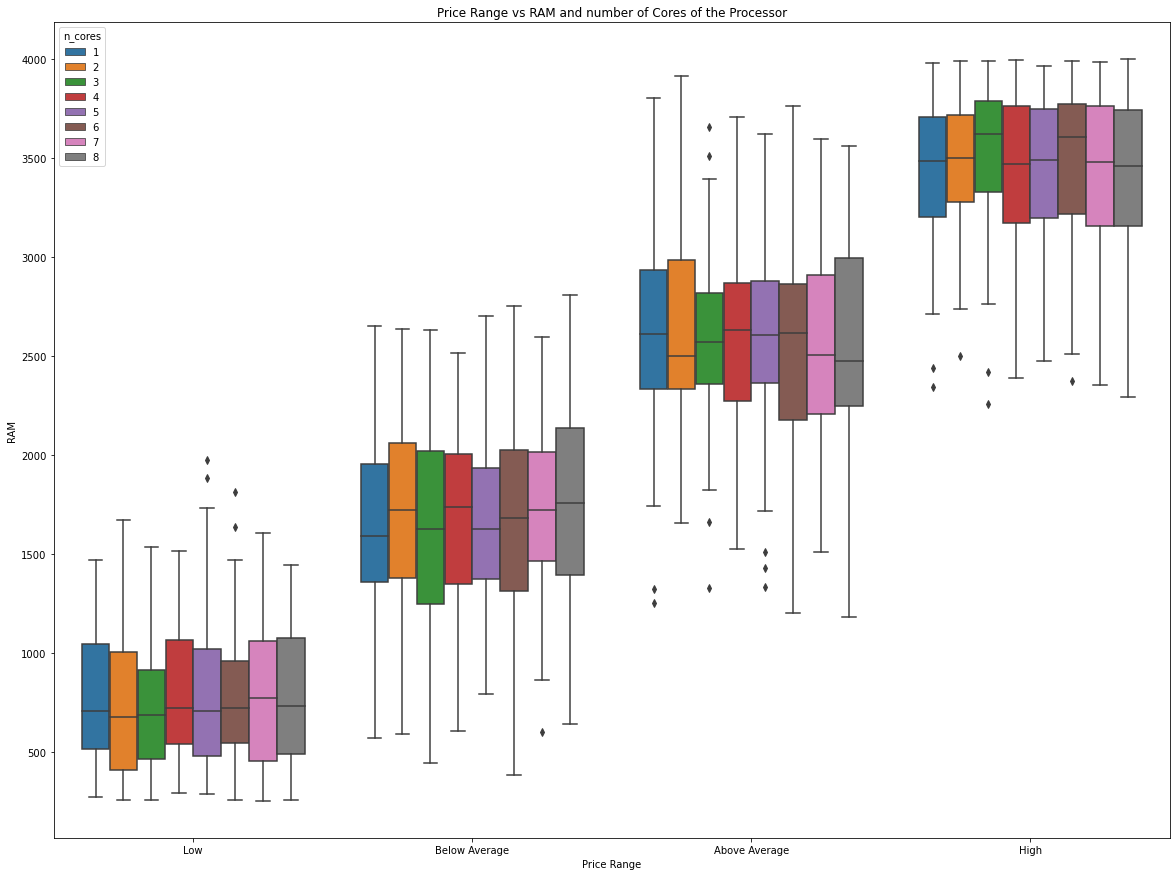

In [27]:
plt.subplots(figsize=(20,15))
sns.boxplot(data=df, x="price_range", y="ram", hue="n_cores", order= orderx)
plt.title("Price Range vs RAM and number of Cores of the Processor")
plt.ylabel('RAM')
plt.xlabel('Price Range')

According to our plot, the more expensive phones were not touch screen. However, according to our Chi-Square test of Independence, the difference isn't statistically significant. 

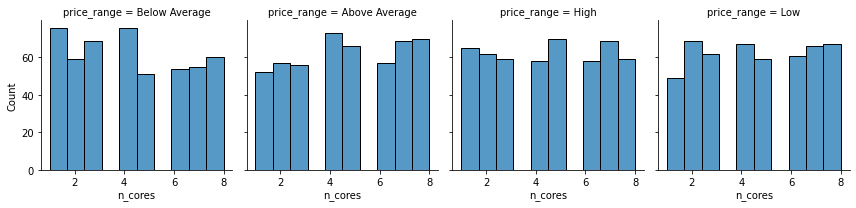

In [28]:
g_cores = sns.FacetGrid(df, col="price_range")
g_cores.map(sns.histplot, 'n_cores')

<AxesSubplot:xlabel='px_width', ylabel='sc_w'>

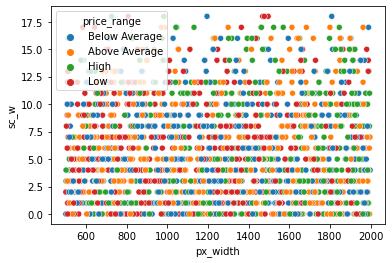

In [29]:
sns.scatterplot(x="px_width", y="sc_w", hue = "price_range", data=df)

<AxesSubplot:xlabel='price_range', ylabel='px_width'>

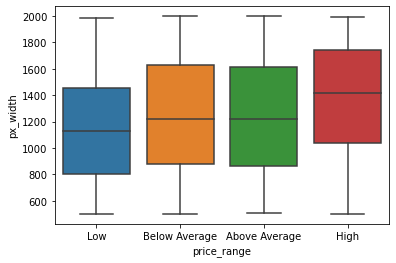

In [30]:
sns.boxplot(x="price_range", y="px_width", data=df, order=orderx)

<AxesSubplot:xlabel='price_range', ylabel='sc_w'>

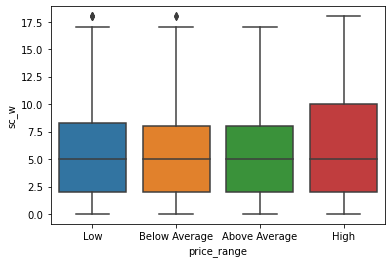

In [31]:
sns.boxplot(x="price_range", y="sc_w", data=df, order=orderx)

Text(0.5, 1.0, 'Percentage of Phones with Data Type by Price Range')

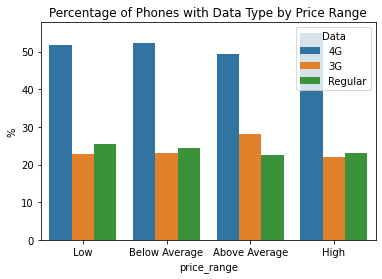

In [32]:
df_data_count = df.groupby('price_range')['Data'].value_counts(normalize=True).rename('%').mul(100).reset_index()
sns.barplot(x="price_range", y="%", hue='Data', order=orderx, data=df_data_count)
plt.title('Percentage of Phones with Data Type by Price Range')

<AxesSubplot:xlabel='int_memory', ylabel='ram'>

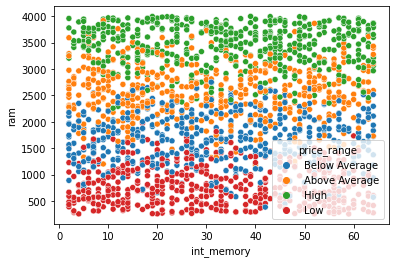

In [33]:
sns.scatterplot(x="int_memory", y="ram", hue = "price_range", data=df)

<AxesSubplot:>

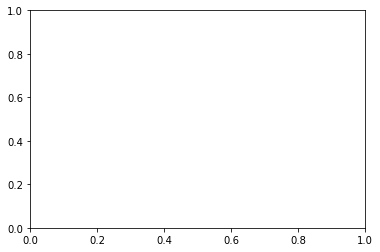

In [34]:
sns.scatterplot()